# Control óptimo para un modelo SIR determinista

## Francisco Valentín Valerio López
## Facultad de Ciencias Físico Matemáticas - Benemérita Universidad Autónoma de Puebla

### Introducción

Supongamos que tenemos un escenario en el que una enfermedad infecciosa se propaga entre los individuos de una población de tamaño $N$, los cuales se encuentran distribuidos en distintas regiones geográficas. Cada una de las regiones contiene una subpoblación de tamaño $N_i$, y son tales que $\sum_{i=1}^N N_i = N$. Los individuos en cada región pueden desplazarse entre las regiones e interactuar entre sí.

<div style="text-align: center">
    <figure>
        <img src='img\map.jpg' width='600' height='400' />
        <figcaption> Esquema que representa el flujo de habitantes en una población espacialmente estructurada.</figcaption>
    </figure>
</div>

La interacción entre los individuos contagiados y los individuos susceptibles a contagiarse provoca que la enfermedad se propague dentro de la población y se produzca una epidemia. Es por este motivo que, con el objetivo de reducir el impacto de una epidemia en la población, las autoridades de salud pública realizan intervenciones que tienen como objetivo *controlar* la propagación de la enfermedad. Algunas de las estrategias más comunes de intervención son la vacunación, el aislamiento de individuos infectados, medidas de distanciamiento social y el rastreo de contactos.

Sin embargo, la implementación de estas estrategias conllevan un costo económico y social, por lo que es deseable que se logren aplicar de manera óptima al reducir el costo. 

<div style="text-align: center">
    <figure>
        <img src='img\control.jpg' width='550' height='400' style="padding-right: 10px;" />
        <img src='img\cost.jpg' width='550' height='400' style="padding-left: 10px;" />
        <figcaption>Implementar una estrategia de control para reducir el impacto de una epidemia es costoso. Lo ideal es lograr reducir el contagio con la menor cantidad de recursos. </figcaption>
    </figure>
</div>

¿Cómo se puede encontrar la estrategia de control óptima que minimíce el costo de reducir la propagación de la enfermedad? Esta pregunta corresponde a un problema de control óptimo que buscamos resolver con este trabajo.

### Modelo epidemiológico SIR

El [modelo epidemiológico SIR](https://mathworld.wolfram.com/Kermack-McKendrickModel.html) es un modelo matemático que se utiliza para describir la dinámica de una enfermedad infecciosa en una población. Este modelo considera que existen tres grupos, o compartimentos, en los que se divide a la población:

- Susceptibles ($S$): Son los individuos propensos a contagiarse de la enfermedad, es decir, aquellos que no han sido infectados aún y que no son inmunes a la enfermedad.

- Infectados ($I$): Son los individuos que han sido infectados con la enfermedad y son capaces de transmitirla a los susceptibles.

- Recuperados ($R$): Son aquellos que se han recuperado de la enfermedad y que ahora son inmunes a ella.

La transición entre los distintos grupos se entiende mejor utilizando el diagrama de bloques que se muestra a continuación. 

<div style="text-align: center">
    <figure>
        <img src='img\sir_block.png' width='800' height='250' />
        <figcaption> Diagrama de bloques para el modelo SIR.</figcaption>
    </figure>
</div>

Inicialmente, en el compartimento de susceptibles se encuentra la mayor parte de la población, excepto por los individuos que se han infectado de la enfermedad. Posteriormente, los individuos se mueven de $S$ a $I$ a una tasa proporcional al número de contactos entre los susceptibles y los infectados, $\beta SI$. Finalmente, los individuos infectados se mueven de $I$ a $R$ a una tasa proporcional al número actual de infectados, $\gamma I$.

El modelo SIR supone que la población es *cerrada* (sin nacimientos y sin decesos) y que está *mezclada homogéneamente* (es decir, que todos los individuos tienen la misma probabilidad de tener contacto con cualquier otro). Denotando a $S(t), I(t)$ y $R(t)$ como las fracciones de individuos susceptibles, infectados y recuperados al tiempo $t$, respectivamente, la dinámica se expresa a través del siguiente sistema de ecuaciones diferenciales:

$$
    \begin{split}
        \frac{dS}{dt} &= - \beta S I \\
        \frac{dI}{dt} &= \beta S I  - \gamma I \\
        \frac{dR}{dt} &= \gamma I \\
        \end{split} \tag{1}
$$

con las condiciones iniciales: $S(0) = S_0 > 0 , \quad I(0) = I_0 > 0 , \quad R(0)=0$.

Los parámetros $\beta$ y $\gamma$ del modelo (1) son esenciales para describir la dinámica de la enfermedad en la población:

- $\beta$ se conoce como la *tasa de transmisión* y describe cuántas personas susceptibles, en promedio, un individuo infectado contagiará por unidad de tiempo.

- $\gamma$ es la *tasa de recuperación* y representa la fracción de individuos que se recupera y se vuelve inmune a la enfermedad por unidad de tiempo.

Ambos parámetros son esenciales para determinar el *número básico de reproducción*, $\mathcal{R}_0$, que determina el número promedio de personas que un individuo infectado contagiará durante su periodo infeccioso, éste se define como:

$$
    \mathcal{R}_0 \equiv \frac{\beta}{\gamma} \tag{2}
$$

La importancia de $\mathcal{R}_0$ es que nos otorga información acerca del potencial de propagacióon de una enfermedad.

- Si $\mathcal{R}_0 > 1$, cada persona infectada transmitirá la enfermedad a más de una persona en promedio, y por lo tanto la enfermedad se propagará en la población.

- Si $\mathcal{R}_0 < 1$, cada persona infectada transmitirá la enfermedad a menos de una persona en promedio, lo que significa que eventualmente la epidemia se extinguirá en la población.

Ahora, de manera general, si queremos implementar una estrategia de control cuyo objetivo sea disminuir la tasa de transmisión en la población, podemos añadir un *término de control* al modelo (1) de la siguiente forma:

$$
    \begin{split}
            \frac{dS}{dt} &= -(1-u) \beta S I \\
            \frac{dI}{dt} &= (1-u) \beta S I  - \gamma I \\
            \frac{dR}{dt} &= \gamma I \\
        \end{split} \tag{2}
$$

donde $u$ es la *estrategia de control* aplicada sobre el sistema. Este parámetro cumple con la condición:

$$
    0 \leq u(t) \leq 1,  \quad \forall t \in [t_0, t_f] \tag{3}
$$

Veamos qué pasa si consideramos los extremos para este parámetro.

- Si $u=0$, tenemos *control nulo*, que implica no intervenir para detener la propagación de la enfermedad, y por lo tanto, la dinámica del sistema no se ve afectada.

- Si $u=1$, hay un *control máximo*, que corresponde a una intervención que detiene por completo la propagación de la enfermedad.

Como mencionamos anteriormente, es deseable para las autoridades de salud y gubernamentales que dicho control sea óptimo, al minimizar el costo que toma implementarlos, logrando reducir a lo más posible la propagación de la enfermedad. Veamos la manera en la que podemos formular este problema.

### Control óptimo

Consideremos la siguiente *función de costo*:

$$
    J(S,I,t) = h(I(t_f, t_f)) + \int_{t_0}^{t_f} g(I(\tau), u(\tau), \tau) \, d \tau \tag{4}
$$

donde $h(I(t_f, t_f))$ es el costo final, que en este contexto puede representar el costo asociado al estado final del sistema, por ejemplo, los costos de atención médica para las personas infectadas al tiempo $t_f$; el segundo término es el costo instantáneo a lo largo del periodo $[t_0,t_f]$. El objetivo es encontrar la *estrategia de control óptimo* $u^*$ que minimice a la función $J$.

Para resolver este tipo de problemas se puede utilizar la [*ecuación de Hamilton-Jacobi-Bellman*](https://en.wikipedia.org/wiki/Hamilton%E2%80%93Jacobi%E2%80%93Bellman_equation), la cual otorga una condición necesaria y suficiente para la optimalidad de un control con respecto a una función de costo. 

La expresión general de la ecuación de Hamilton-Jacobi-Bellman (HJB) es la siguiente:

$$
    \frac{\partial J}{\partial t} + \min_{u} \Big\{ g(x(t),u(t)) + \nabla J(x(t),t) \cdot f(x(t),u(t))^T \Big\} = 0 \tag{5}
$$

donde $x(t)$ representa al estado del sistema, en nuestro caso, el número de susceptibles e infectados, $f(x,u)$ es la dinámica del sistema, y $g(x,u)$ representa el costo instantáneo de tener un estado del sistema y aplicar las medidas de control $u$. 

Podemos encontrar la ley de control óptimo utilizando el [*principio de optimalidad de Bellman*](https://en.wikipedia.org/wiki/Bellman_equation#Bellman's_principle_of_optimality), el cual establece que una política óptima tiene la propiedad de que, sin importar el estado en el que se encuentre el sistema, el control que se elija a partir de ese punto debe ser óptima respecto a los estados restantes. En la práctica, equivale a aplicar el operador de minimización en (5), derivando respecto a $u$, y suponiendo que la $u$ que satisface la igualdad es la política de control que buscamos, es decir $u = u^*$. 

Para nuestro problema particular, es necesario proponer una función de costo instantáneo. Sea:

$$
    g(I,u,t) = a I^2 + b u^2 \quad a,b \in \mathbb{R} \tag{6}
$$

donde:

- $a I^2$ supone que el costo aumenta cuadráticamente con $I$, e intenta minimizar la cantidad de individuos infectados en el sistema.

- $b u^2$ representa el costo asociado con la implementación de la estrategia de control y análogo al término anterior, intenta minimizar la intensidad de la intervención.


Entonces, considerando el sistema (2) y la función (6), al sustituir en la ecuación de HJB obtenemos:

$$
    \frac{\partial J}{\partial t} + \min_{u \in \mathcal{U}} \Big\{ aI^2 + b u^2 - (1-u) \beta SI \frac{\partial J}{\partial S} + \left( (1-u) \beta SI - \gamma I \right) \frac{\partial J}{\partial I} \Big\} = 0 \tag{7}
$$

Aplicando el principio de optimalidad de Bellman, podemos encontrar la expresión para $u^*$:

$$
    \boxed{
    u^* = - \frac{\beta S I}{2b} \left( \frac{\partial J}{\partial S} - \frac{\partial J}{\partial I}\right)} \tag{8}
$$

Al sustituir $u = u^*$ en (7) obtenemos la ecuación de HJB para un modelo epidemiológico SIR con control en la tasa de transmisión:

$$
    \boxed{
    \frac{\partial J}{\partial t} + a I^2 - \frac{(\beta SI)^2}{2b} \left(\frac12 \left[ \left( \frac{\partial J}{\partial S} \right)^2 + \left( \frac{\partial J}{\partial I} \right)^2 \right] - \frac{\partial J}{\partial S} \frac{\partial J}{\partial I} \right) + \beta SI \left( \frac{\partial J}{\partial I} - \frac{\partial J}{\partial S} \right) - \gamma I \frac{\partial J}{\partial I} = 0 
    } \tag{9}
$$

Notemos que se trata de una ecuación diferencial parcial no lineal de primer orden. En general es complicado obtener una solución analítica en forma cerrada para este tipo de ecuaciones, así que debemos recurrir a métodos numéricos para conseguir una solución aproximada. Los métodos tradicionales para la resolución de ecuaciones diferenciales parciales son el método de diferencias finitas, el método del elemento finito, métodos de transformadas de Fourier, etcétera. Sin embargo, para el desarrollo de este trabajo se utilizaron redes neuronales artificiales.

### Redes neuronales artificiales informadas por la física

Las [*redes neuronales artificiales informadas por la física*](https://www.sciencedirect.com/science/article/abs/pii/S0021999118307125) en inglés *Physics Informed Neural Networks* (*PINN*), son una extensión reciente del concepto de las redes neuronales artificiales, [*Artificial Neural Networks*](https://www.ibm.com/topics/neural-networks) (*ANN*). Al igual que las ANN, las PINN están diseñadas para aprender relaciones complejas a partir de datos de entrenamiento. Sin embargo, las PINN incorporan el conocimiento previo sobre el sistema físico que se modela, a través de ecuaciones diferenciales que describen la evolución temporal de las variables de interés.

Durante su entrenamiento, las PINN buscan minimizar la diferencia entre las predicciones de la red y la ecuación o ecuaciones diferenciales gobernantes del sistema. De manera muy general, el algoritmo detrás de una PINN se puede resumir como sigue:

- Entrenamos una red neuronal para aproximar la solución de una ecuación diferencial de la forma $\frac{dy}{dt} = f(y,t)$. La función toma como entrada a $t$ y produce una salida $\hat{y}$ que es una aproximación de $y$.

- Como las redes neuronales son diferenciables, se calcula  $\hat{y}'$ con respecto a $t$ utilizando el algoritmo de [*propagación hacia atrás*](http://personal.cimat.mx:8181/~mrivera/cursos/aprendizaje_profundo/backprop/backpropagation.html#redes-multicapa-y-el-algoritmo-de-backpropagation).

- Finalmente, se define una *función de pérdida* (*loss function*) que mide cuán bien se satisface la ecuación diferencial. Suele usarse el error cuadrático médio (MSE) como función de pérdida de la red: 
    $$
        L = \frac{1}{N} \sum_{i=1}^N \left( \frac{d \hat{y_i}}{dt} - f(y_i, t_i) \right)^2 \tag{10}
    $$

De manera gráfica, se muestra el algoritmo de una PINN que resuelva la ecuación de HJB (9):

<div style="text-align: center">
    <figure>
        <img src='img\pinn_diagram.png' width='800' height='500' />
        <figcaption> Esquema del algoritmo de una PINN.</figcaption>
    </figure>
</div>

La idea es utilizar la PINN para aproximar la solución para (9), y una vez que obtengamos dicha solución, obtener a $u^*$ de acuerdo a la forma (8). Para ello se escribió un código en Python, utilizando las bibliotecas de NumPy, Matplotlib, Tensorflow y Keras. A continuación se muestra dicho código.

### Código

#### Creación de la PINN

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D
from tensorflow.keras.optimizers import RMSprop, Adam

In [24]:
# Establecemos los siguientes parámetros: número de épocas de entrenamiento, a, b, beta y gamma y el numero de puntos de entrenamiento

epochs = 1000

a = 5.0

b = 1.5

beta = 2.4

gamma = 1.1

points = 2500

N = 1000

In [11]:
class HJB_SIR(Sequential):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name = 'Loss')
        self.j_tracker = keras.metrics.Mean(name = "J")

    @property
    def metrics(self):
        return [self.loss_tracker, self.j_tracker]
    
    def train_step(self, data):
        S = tf.random.uniform((points, 1), minval = 0, maxval = 1)
        I = tf.random.uniform((points, 1), minval = 0, maxval = 1)
        t = tf.zeros((points, 1), dtype = tf.float32)

        batch_size = tf.shape(S)[0]

        with tf.GradientTape(persistent = True) as tape:

            tape.watch(S)
            tape.watch(I)
            tape.watch(t)

            J = self(tf.concat([S, I, t * tf.ones((batch_size, 1))], axis = 1))

            [dJ_dS, dJ_dI] = tape.gradient(J, [S, I])

            dJ_dt = tape.gradient(J, t)

            S0 = tf.zeros((batch_size, 1))
            I0 = tf.zeros((batch_size, 1))

            ic = tf.concat([S0, I0], axis = 1)

            hjb = 10 *(dJ_dt + a*I**2 - (((beta * S * I)**2)/(2*b)) * (0.5 * ((dJ_dS)**2 + (dJ_dI)**2) - dJ_dS * dJ_dI)
                       + beta * S * I * (dJ_dI - dJ_dS) - gamma * I * dJ_dI)
            
            loss_function = keras.losses.mean_squared_error(0., hjb) + keras.losses.mean_squared_error(0., ic)

        grads = tape.gradient(loss_function, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        self.loss_tracker.update_state(loss_function)
        self.j_tracker.update_state(J)

        return {'Función de pérdida': self.loss_tracker.result(), 'J': self.j_tracker.result()}


In [12]:
modelo_1 = HJB_SIR()

modelo_1.add(Dense(20, activation = 'tanh', input_shape = (3,)))
modelo_1.add(Dense(15, activation = 'tanh'))
modelo_1.add(Dense(10, activation = 'tanh'))
modelo_1.add(Dense(5, activation = 'tanh'))
modelo_1.add(Dense(1, activation = 'exponential'))


In [13]:
modelo_1.summary()

Model: "hjb_sir_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                80        
                                                                 
 dense_6 (Dense)             (None, 15)                315       
                                                                 
 dense_7 (Dense)             (None, 10)                160       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 616
Trainable params: 616
Non-trainable params: 0
_________________________________________________________________


#### Entrenamiento de la red

In [14]:
modelo_1.compile(optimizer = RMSprop(learning_rate = 0.001), metrics = ['Loss'])

In [15]:
X = np.random.randint(0, 1000, size = (points, 3))

Y = np.zeros((points, 1))

In [16]:
start_time = time.time()

history_1 = modelo_1.fit(X, Y, epochs = epochs, batch_size = 100, verbose = 1)

end_time = time.time()

Epoch 1/1000
25/25 [==============================] - 2s 16ms/step - Función de pérdida: 325.5406 - J: 1.5773
Epoch 2/1000
25/25 [==============================] - 0s 13ms/step - Función de pérdida: 111.8607 - J: 2.2071
Epoch 3/1000
25/25 [==============================] - 0s 12ms/step - Función de pérdida: 70.1173 - J: 2.6965
Epoch 4/1000
25/25 [==============================] - 0s 12ms/step - Función de pérdida: 49.5999 - J: 2.9961
Epoch 5/1000
25/25 [==============================] - 0s 12ms/step - Función de pérdida: 33.1334 - J: 3.1279
Epoch 6/1000
25/25 [==============================] - 0s 12ms/step - Función de pérdida: 23.2737 - J: 3.0428
Epoch 7/1000
25/25 [==============================] - 0s 12ms/step - Función de pérdida: 16.4262 - J: 2.8033
Epoch 8/1000
25/25 [==============================] - 0s 12ms/step - Función de pérdida: 10.0685 - J: 2.5424
Epoch 9/1000
25/25 [==============================] - 0s 12ms/step - Función de pérdida: 6.2679 - J: 2.3078
Epoch 10/1000
25/2

In [17]:
training_time = end_time - start_time

print(f'Tiempo de entrenamiento: {training_time} s')
print(f'Tiempo de entrenamiento: {training_time/60} min')

Tiempo de entrenamiento: 288.78246879577637 s
Tiempo de entrenamiento: 4.813041146596273 min


#### Resultados del entrenamiento

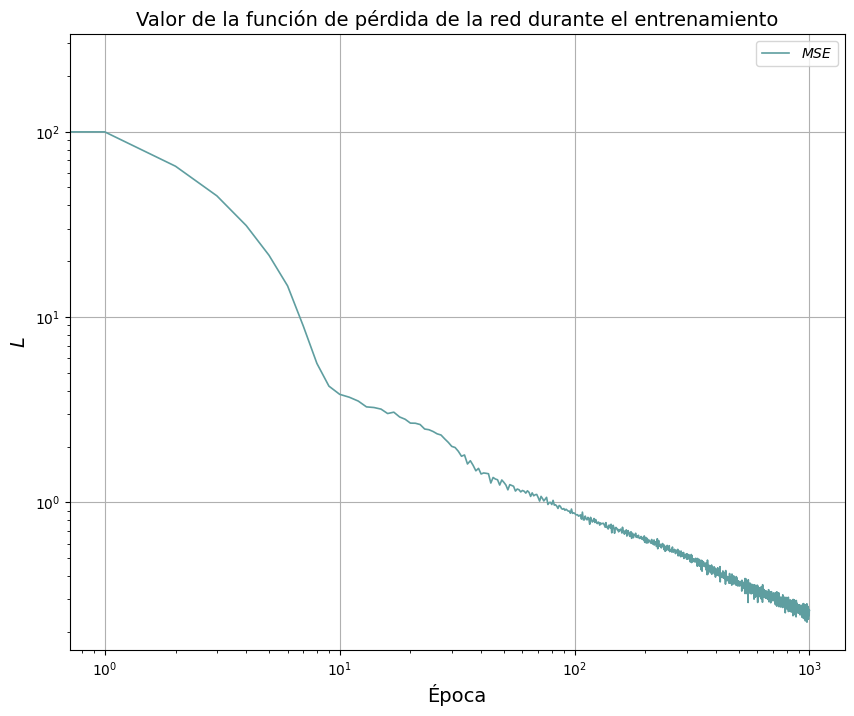

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8), dpi = 100)
ax.loglog(history_1.history['Función de pérdida'], lw = 1.2, color = 'cadetblue', label = r'$MSE$')
ax.set_title('Valor de la función de pérdida de la red durante el entrenamiento', fontsize = 14)
ax.set_xlabel('Época', fontsize = 14)
ax.set_ylabel(r'$L$', fontsize = 14)
ax.legend()
ax.grid()
plt.show()


#### Gráfica de la solución

31250/31250 [==============================] - 59s 2ms/step


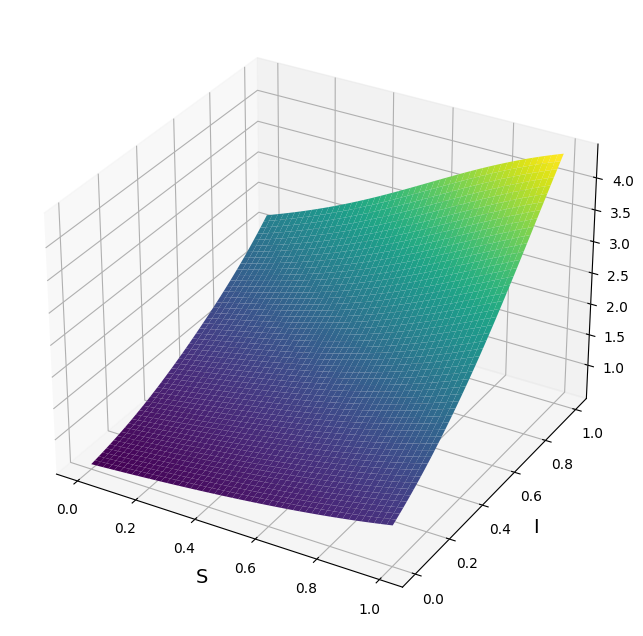

In [26]:
S_range = np.linspace(0, 1, N)
I_range = np.linspace(0, 1, N)

S_mesh, I_mesh = np.meshgrid(S_range, I_range)

J_mesh = modelo_1.predict(np.column_stack((S_mesh.ravel(), I_mesh.ravel(), np.zeros_like(S_mesh.ravel()))))
J_mesh = np.reshape(J_mesh, S_mesh.shape)

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(S_mesh, I_mesh, J_mesh, cmap = 'viridis')
ax.set_xlabel('S', fontsize = 14)
ax.set_ylabel('I', fontsize = 14)
ax.set_zlabel('J', fontsize = 14)
plt.show()



#### Cálculo del control óptimo

In [27]:
def u_optimo(S, I, modelo):

    with tf.GradientTape() as tape:

        tape.watch(S)
        tape.watch(I)

        J = modelo_1(tf.concat([S, I, tf.zeros_like(S)], axis = 1))
        [dJ_dS, dJ_dI] = tape.gradient(J, [S,I])

    u = tf.math.abs((-beta * S * I) / (2*b) * (dJ_dS - dJ_dI))

    return u

#### Simulación del modelo SIR controlado

In [57]:
N_pob = 1500

S0 = 1499/N_pob
I0 = (N_pob - S0)/N_pob
R0 = 0.0

dt = 0.001
t_max = 15

S = np.zeros(int(t_max/dt) + 1)
I = np.zeros(int(t_max/dt) + 1)
R = np.zeros(int(t_max/dt) + 1)
u = np.zeros(int(t_max/dt) + 1)

S[0] = S0 * N_pob
I[0] = I0 * N_pob
R[0] = R0 * N_pob

for i in range(1, len(S)):

    u[i] = u_optimo(tf.constant([[S[i-1]]], dtype = tf.float32),
                    tf.constant([[I[i-1]]], dtype = tf.float32), modelo_1)
    
    dS = -(1- u[i]) * beta * S[i-1] * I[i-1]/N
    dI = (1 - u[i]) * beta * S[i-1] * I[i-1]/N - gamma * I[i-1]
    dR = gamma * I[i-1]

    S[i] = S[i-1] + dS * dt
    I[i] = I[i-1] + dI * dt
    R[i] = R[i-1] + dR * dt
    


#### Simulación del modelo SIR sin control

In [58]:
# Vectorizamos las variables
S_no = np.zeros(int(t_max/dt)+1)
I_no = np.zeros(int(t_max/dt)+1)
R_no = np.zeros(int(t_max/dt)+1)
#u = np.zeros(int(t_max/dt)+1)

# Inicializamos con condiciones iniciales
S_no[0] = S0*N_pob
I_no[0] = I0*N_pob
R_no[0] = R0*N_pob

# Simulamos con el método de Euler sin control (u = 0)
for i in range(1, len(S_no)):


    dS_no = -beta*S_no[i-1]*I_no[i-1]/N_pob

    dI_no = beta*S_no[i-1]*I_no[i-1]/N_pob - gamma*I_no[i-1]

    dR_no = gamma*I_no[i-1]

    S_no[i] = S_no[i-1] + dS_no*dt
    I_no[i] = I_no[i-1] + dI_no*dt
    R_no[i] = R_no[i-1] + dR_no*dt

#### Gráficas de los resultados

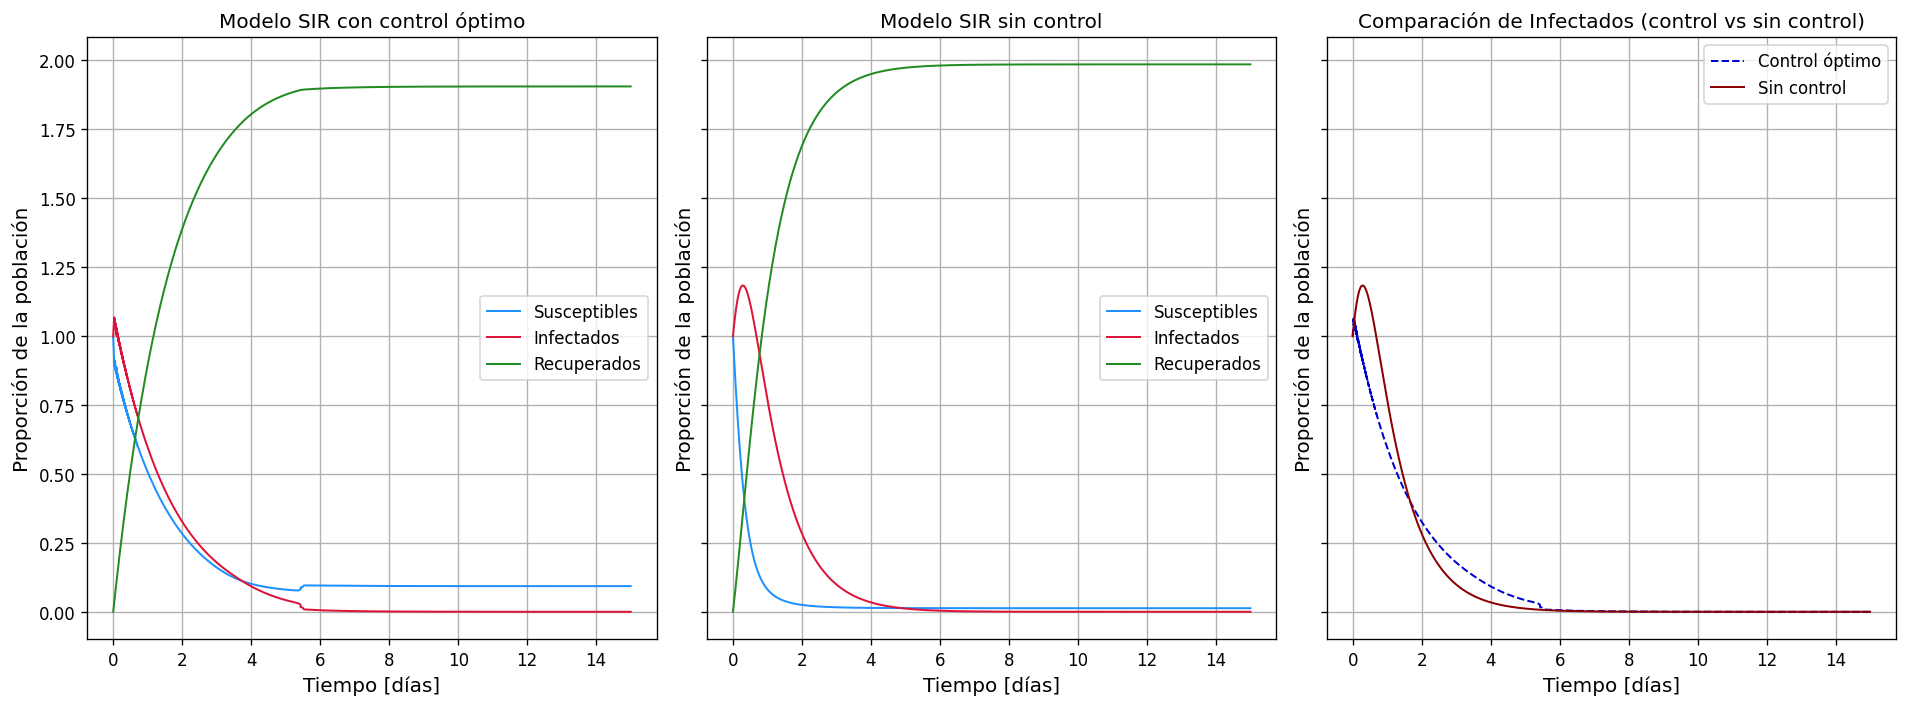

In [59]:
t = np.linspace(0, t_max, len(S))
fig, (ax1,ax2, ax3) = plt.subplots(1, 3, figsize =(16,6), dpi = 120, sharey = True)
ax1.plot(t, S/N_pob, lw = 1.2, color = 'dodgerblue', label = 'Susceptibles')
ax1.plot(t, I/N_pob, lw = 1.2, color = 'crimson', label = 'Infectados')
ax1.plot(t, R/N_pob, lw = 1.2, color = 'forestgreen', label = 'Recuperados')
ax1.set_xlabel('Tiempo [días]', fontsize = 12)
ax1.set_ylabel('Proporción de la población', fontsize = 12)
ax1.set_title('Modelo SIR con control óptimo', fontsize = 12)
ax2.plot(t, S_no/N_pob, lw = 1.2, color = 'dodgerblue', label = 'Susceptibles')
ax2.plot(t, I_no/N_pob, lw = 1.2, color = 'crimson', label = 'Infectados')
ax2.plot(t, R_no/N_pob, lw = 1.2, color = 'forestgreen', label = 'Recuperados')
ax2.set_xlabel('Tiempo [días]', fontsize = 12)
ax2.set_ylabel('Proporción de la población', fontsize = 12)
ax2.set_title('Modelo SIR sin control', fontsize = 12)
ax3.plot(t, I/N_pob, lw = 1.2, ls = '--', color = 'mediumblue', label = 'Control óptimo')
ax3.plot(t, I_no/N_pob, lw = 1.2, color = 'darkred', label = 'Sin control')
ax3.set_xlabel('Tiempo [días]', fontsize = 12)
ax3.set_ylabel('Proporción de la población', fontsize = 12)
ax3.set_title('Comparación de Infectados (control vs sin control)', fontsize = 12)
ax1.legend()
ax2.legend()
ax3.legend()
ax1.grid()
ax2.grid()
ax3.grid()
plt.tight_layout()
plt.show()